<a href="https://colab.research.google.com/github/inspire-lab/CyberAI-labs/blob/main/category-SecureAI/Privacy-attacks-model-stealing/Model_stealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Stealing Example

In this lab, we'll learn about model stealing attack using [ART](https://adversarial-robustness-toolbox.readthedocs.io/en/latest/).

In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

In [ ]:
!pip install adversarial-robustness-toolbox==1.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.27.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
import art
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Flatten, InputLayer, Reshape
from art.estimators.classification.keras import KerasClassifier

In [ ]:
# Prepare the dataset and the model architecture.

import art
from art.utils import load_mnist

# Load the dataset, and split the test data into test and steal datasets.
(x_train, y_train), (x_test0, y_test0), _, _ = load_mnist()
len_steal = 5000
indices = np.random.permutation(len(x_test0))
x_steal = x_test0[indices[:len_steal]]
y_steal = y_test0[indices[:len_steal]]
x_test = x_test0[indices[len_steal:]]
y_test = y_test0[indices[len_steal:]]

im_shape = x_train[0].shape
def get_model(num_classes=10, c1=32, c2=64, d1=128):
    model = Sequential()
    model.add(Conv2D(c1, kernel_size=(3, 3), activation='relu', input_shape=im_shape))
    model.add(Conv2D(c2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(d1, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer="sgd",
                          metrics=['accuracy'])
    return model

In [ ]:
# Train the original model.
num_epochs = 1
model = get_model(num_classes=10, c1=32, c2=64, d1=128)
print("Original model training:")
model.fit(x_train, y_train, batch_size=100, epochs=num_epochs)
print("Original model evaluation:")
print(model.evaluate(x_test, y_test))
classifier_original = KerasClassifier(model, clip_values=(0, 1), use_logits=False)

Original model training:
Train on 60000 samples
60000/60000 [==============================] - 183s 3ms/sample - loss: 0.6691 - accuracy: 0.8118
Original model evaluation:


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.26403951604366305, 0.921]


In [ ]:
# Stealing from the unprotected classifier.
from art.attacks import ExtractionAttack
from art.attacks.extraction import CopycatCNN, KnockoffNets

attack_catalogue = {"Probabilistic CopycatCNN":
#####################
#Your code goes here
#####################
                    "Argmax CopycatCNN": CopycatCNN(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                    "Probabilistic KnockoffNets": KnockoffNets(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax KnockoffNets":
#####################
#Your code goes here
#####################
                   }

results = []
for len_steal in [250, 500, 1000, 2000, 4000, 5000]:
    indices = np.random.permutation(len(x_test0))
    x_steal = x_test0[indices[:len_steal]]
    y_steal = y_test0[indices[:len_steal]]
    x_test = x_test0[indices[len_steal:]]
    y_test = y_test0[indices[len_steal:]]

    for name, attack in attack_catalogue.items():
        model_stolen = get_model(num_classes=10, c1=32, c2=64, d1=128)
        classifier_stolen = KerasClassifier(model_stolen, clip_values=(0, 1), use_logits=False)
        classifier_stolen =
#####################
#Your code goes here
#####################
        acc = classifier_stolen._model.evaluate(x_test, y_test)[1]
        print(name, ":", acc)
        results.append((name, len_steal, acc))

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 250 samples
250/250 [==============================] - 1s 3ms/sample - loss: 2.2984 - accuracy: 0.0600


Probabilistic CopycatCNN : 0.103179485
Train on 250 samples
250/250 [==============================] - 1s 3ms/sample - loss: 2.3106 - accuracy: 0.1240


Argmax CopycatCNN : 0.100307696


Probabilistic KnockoffNets : 0.15476923
Argmax KnockoffNets : 0.06871795


Train on 500 samples
500/500 [==============================] - 2s 3ms/sample - loss: 2.3122 - accuracy: 0.0600


Probabilistic CopycatCNN : 0.11663158
Train on 500 samples
500/500 [==============================] - 1s 3ms/sample - loss: 2.2972 - accuracy: 0.1020


Argmax CopycatCNN : 0.17094737
Probabilistic KnockoffNets : 0.2296842


Argmax KnockoffNets : 0.1796842


Train on 1000 samples
1000/1000 [==============================] - 4s 4ms/sample - loss: 2.2865 - accuracy: 0.1420
Probabilistic CopycatCNN : 0.15977778


Train on 1000 samples
1000/1000 [==============================] - 4s 4ms/sample - loss: 2.2742 - accuracy: 0.1270


Argmax CopycatCNN : 0.12988889


Probabilistic KnockoffNets : 0.23988889
Argmax KnockoffNets : 0.16644445


Train on 2000 samples
2000/2000 [==============================] - 5s 3ms/sample - loss: 2.2632 - accuracy: 0.1770
Probabilistic CopycatCNN : 0.2075


Train on 2000 samples
2000/2000 [==============================] - 5s 3ms/sample - loss: 2.2853 - accuracy: 0.2000
Argmax CopycatCNN : 0.423125


Probabilistic KnockoffNets : 0.1905


Argmax KnockoffNets : 0.43125


Train on 4000 samples
4000/4000 [==============================] - 13s 3ms/sample - loss: 2.2342 - accuracy: 0.3408
Probabilistic CopycatCNN : 0.60466665


Train on 4000 samples
4000/4000 [==============================] - 12s 3ms/sample - loss: 2.0659 - accuracy: 0.5027
Argmax CopycatCNN : 0.674


Probabilistic KnockoffNets : 0.72583336
Argmax KnockoffNets : 0.5975


Train on 5000 samples
5000/5000 [==============================] - 15s 3ms/sample - loss: 2.1887 - accuracy: 0.4088


Probabilistic CopycatCNN : 0.529
Train on 5000 samples
5000/5000 [==============================] - 26s 5ms/sample - loss: 2.1177 - accuracy: 0.4136


Argmax CopycatCNN : 0.532
Probabilistic KnockoffNets : 0.4656


Argmax KnockoffNets : 0.5926


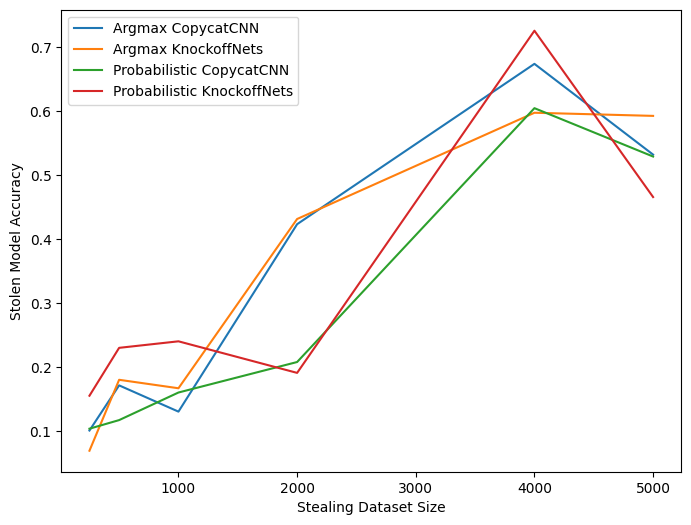

In [ ]:
import pandas as pd
df = pd.DataFrame(results, columns=('Method Name', 'Stealing Dataset Size', 'Accuracy'))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")
for name, group in df.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)
plt.show()

In [ ]:
# Prepare the defense layer.
from art.defences.postprocessor import ReverseSigmoid
postprocessor = ReverseSigmoid(beta=1.0, gamma=0.2)
classifier_protected = KerasClassifier(model, clip_values=(0, 1), use_logits=False, postprocessing_defences=postprocessor)

# Below is used by `FunctionallyEquivalentExtraction`.
model_flat = Sequential([InputLayer([784]), Reshape([28, 28, 1]), model])
model_flat.compile('sgd', 'categorical_crossentropy', ['accuracy'])
classifier_flat_protected = KerasClassifier(model_flat, clip_values=(0, 1), use_logits=False, postprocessing_defences=postprocessor)

In [ ]:
# Stealing from the protected classifier.

attack_catalogue = {
                    "Probabilistic CopycatCNN (vs. Protected)": CopycatCNN(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax CopycatCNN (vs. Protected)": CopycatCNN(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                    "Probabilistic KnockoffNets (vs. Protected)": KnockoffNets(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax KnockoffNets (vs. Protected)": KnockoffNets(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
#                     "FunctionallyEquivalentExtraction": FunctionallyEquivalentExtraction(classifier=classifier_flat_protected,
#                                               num_neurons=128),  # This one takes too long time for this dataset/model.
                    }

results_protected = []
for len_steal in [250, 500, 1000, 2000, 4000, 5000]:
    indices = np.random.permutation(len(x_test0))
    x_steal = x_test0[indices[:len_steal]]
    y_steal = y_test0[indices[:len_steal]]
    x_test = x_test0[indices[len_steal:]]
    y_test = y_test0[indices[len_steal:]]

    for name, attack in attack_catalogue.items():
        model_stolen = get_model(num_classes=10, c1=32, c2=64, d1=128)
        classifier_stolen = KerasClassifier(model_stolen, clip_values=(0, 1), use_logits=False)
        if name=="FunctionallyEquivalentExtraction":
            classifier_stolen = attack.extract(np.reshape(x_steal, [len(x_steal), -1]), y_steal, thieved_classifier=classifier_stolen)
        else:
            classifier_stolen = attack.extract(x_steal, y_steal, thieved_classifier=classifier_stolen)

        acc = classifier_stolen._model.evaluate(x_test, y_test)[1]
        print(name, ":", acc)
        results_protected.append((name, len_steal, acc))


Train on 250 samples
250/250 [==============================] - 1s 3ms/sample - loss: 2.3033 - accuracy: 0.1400


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Probabilistic CopycatCNN (vs. Protected) : 0.11394872


Train on 250 samples
250/250 [==============================] - 1s 3ms/sample - loss: 2.3082 - accuracy: 0.0600
Argmax CopycatCNN (vs. Protected) : 0.07333333


Probabilistic KnockoffNets (vs. Protected) : 0.1531282


Argmax KnockoffNets (vs. Protected) : 0.13671795


Train on 500 samples
500/500 [==============================] - 1s 3ms/sample - loss: 2.3057 - accuracy: 0.1420


Probabilistic CopycatCNN (vs. Protected) : 0.14778948
Train on 500 samples
500/500 [==============================] - 1s 3ms/sample - loss: 2.2957 - accuracy: 0.1440


Argmax CopycatCNN (vs. Protected) : 0.13978948
Probabilistic KnockoffNets (vs. Protected) : 0.05863158


Argmax KnockoffNets (vs. Protected) : 0.15894736


Train on 1000 samples
1000/1000 [==============================] - 3s 3ms/sample - loss: 2.3006 - accuracy: 0.1850


Probabilistic CopycatCNN (vs. Protected) : 0.16155556
Train on 1000 samples
1000/1000 [==============================] - 3s 3ms/sample - loss: 2.2838 - accuracy: 0.1500
Argmax CopycatCNN (vs. Protected) : 0.19366667


Probabilistic KnockoffNets (vs. Protected) : 0.10622222


Argmax KnockoffNets (vs. Protected) : 0.27855554


Train on 2000 samples
2000/2000 [==============================] - 6s 3ms/sample - loss: 2.3016 - accuracy: 0.1360
Probabilistic CopycatCNN (vs. Protected) : 0.1485


Train on 2000 samples
2000/2000 [==============================] - 7s 4ms/sample - loss: 2.2693 - accuracy: 0.1700


Argmax CopycatCNN (vs. Protected) : 0.3025


Probabilistic KnockoffNets (vs. Protected) : 0.151875
Argmax KnockoffNets (vs. Protected) : 0.50275


Train on 4000 samples
4000/4000 [==============================] - 13s 3ms/sample - loss: 2.3018 - accuracy: 0.0627


Probabilistic CopycatCNN (vs. Protected) : 0.06583333
Train on 4000 samples
4000/4000 [==============================] - 12s 3ms/sample - loss: 2.1281 - accuracy: 0.4952


Argmax CopycatCNN (vs. Protected) : 0.66083336
Probabilistic KnockoffNets (vs. Protected) : 0.12666667


Argmax KnockoffNets (vs. Protected) : 0.5351667


Train on 5000 samples
5000/5000 [==============================] - 15s 3ms/sample - loss: 2.3020 - accuracy: 0.1188
Probabilistic CopycatCNN (vs. Protected) : 0.1424


Train on 5000 samples
5000/5000 [==============================] - 17s 3ms/sample - loss: 2.0648 - accuracy: 0.4658
Argmax CopycatCNN (vs. Protected) : 0.4392


Probabilistic KnockoffNets (vs. Protected) : 0.1526
Argmax KnockoffNets (vs. Protected) : 0.7242


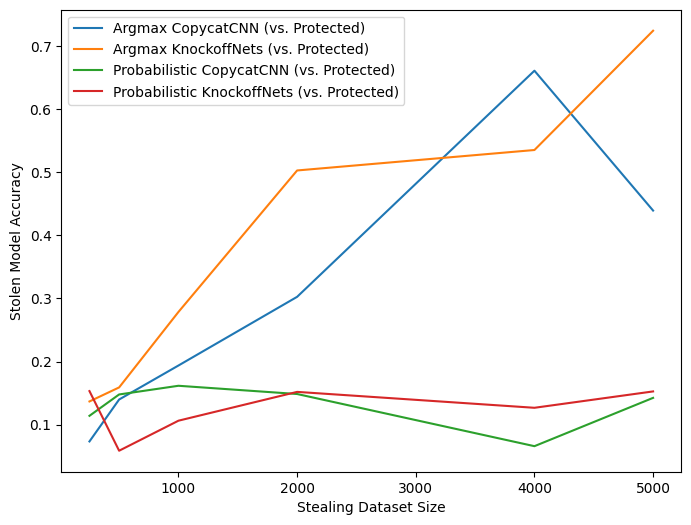

In [ ]:
import pandas as pd
df_protected = pd.DataFrame(results_protected, columns=('Method Name', 'Stealing Dataset Size', 'Accuracy'))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")
for name, group in df_protected.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)
plt.show()

In [ ]:
df_combined = pd.concat([df, df_protected])
groupby = df_combined.groupby("Method Name")

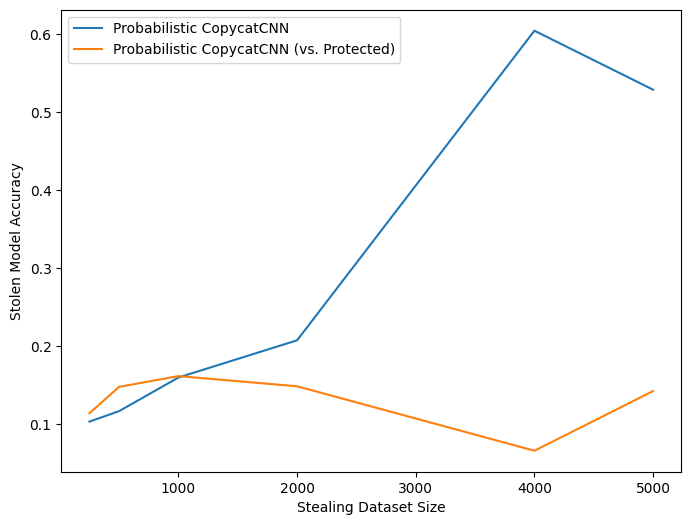

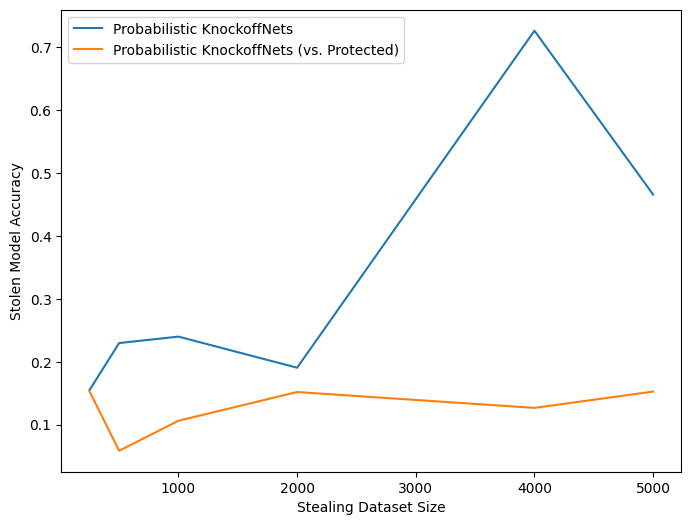

In [ ]:
names = ["CopycatCNN", "KnockoffNets"]
for name in names:
    fig, ax = plt.subplots(figsize=(8,6))
    groupby.get_group("Probabilistic " + name).plot(1,2,ax=ax, label="Probabilistic " + name)
    groupby.get_group("Probabilistic " + name + " (vs. Protected)").plot(1,2,ax=ax, label="Probabilistic " + name + " (vs. Protected)")
    ax.set_xlabel("Stealing Dataset Size")
    ax.set_ylabel("Stolen Model Accuracy")
    fig.show()

# References

1. https://github.com/Trusted-AI/adversarial-robustness-toolbox/
2. https://adversarial-robustness-toolbox.readthedocs.io/en/latest/